### Sklearn Library 

In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cluster import KMeans
import seaborn as sns

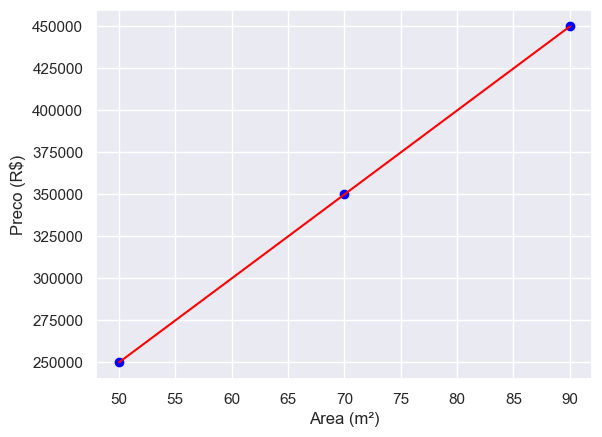

Preço previsto para uma cada de 80 m² [[400000.]]


C:\Users\D18_11\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
data = {'area': [50,70,90], 'preco':[250000,350000,450000]}
df = pd.DataFrame(data)

x = df[['area']]
y = df[['preco']]

model = LinearRegression()
model.fit(x,y)

plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color ='red')
plt.xlabel("Area (m²)")
plt.ylabel("Preco (R$)")
plt.show()

area_nova = 80
preco_previsto = model.predict([[area_nova]])
print("Preço previsto para uma cada de 80 m²", preco_previsto)


In [45]:
model.coef_

array([[5000.]])

In [46]:
model.intercept_

array([1.16415322e-10])

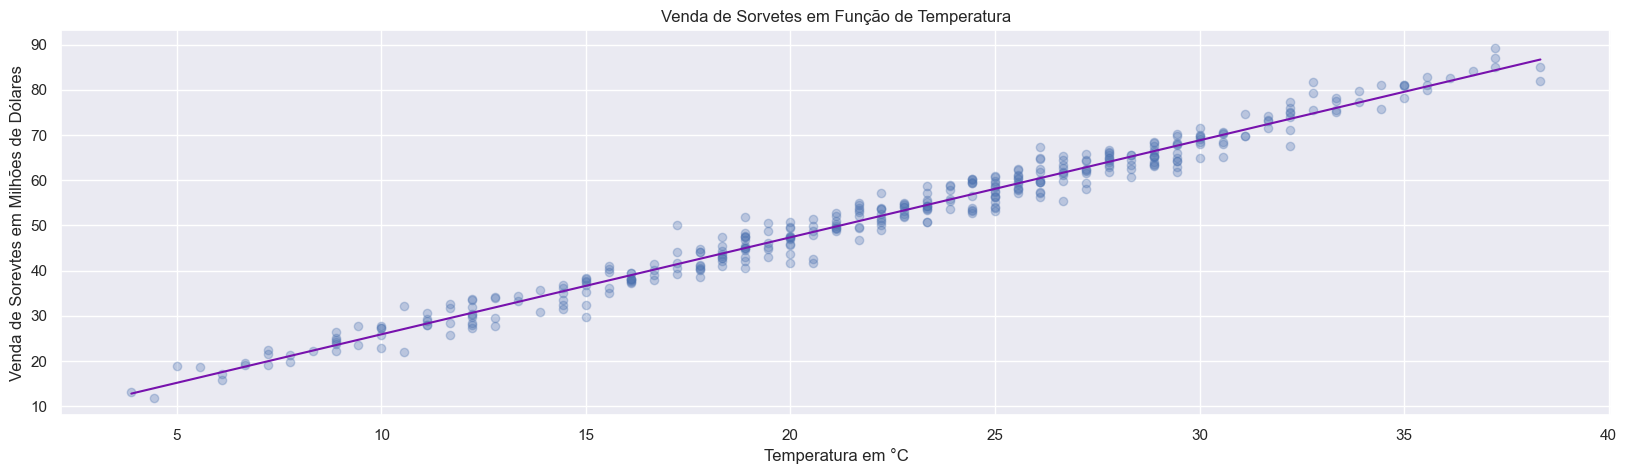

In [47]:
df = pd.read_csv('Ice Cream Sales - temperatures.csv')
data = df.copy()
data = data.dropna()

data['Temperature'] = [round((t-32)/1.8,2) for t in data["Temperature"]]

x = data[['Temperature']]
y = data['Ice Cream Profits']

model = LinearRegression()
model.fit(x,y)

f, ax = plt.subplots(figsize =(20,5))
ax.scatter(x,y,alpha=0.3)
ax.plot(x,model.predict(x),color='#7712AD')
ax.set_xlabel("Temperatura em °C")
ax.set_ylabel("Venda de Sorevtes em Milhões de Dólares")
ax.set_title("Venda de Sorvetes em Função de Temperatura")
plt.show()

In [48]:
temperatura = 40
venda_prevista = model.predict([[temperatura]])

print(f'O total de vendas em um dia de {temperatura}°C seria {venda_prevista}')

O total de vendas em um dia de 40°C seria [90.27136209]


C:\Users\D18_11\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Library Statsmodel

In [49]:
data = {'x': [1,2,3,4,5],'y':[2,4,5,4,5]}
df = pd.DataFrame(data)

x = sm.add_constant(df['x'])

model = sm.OLS(df['y'],x)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Sat, 19 Oct 2024   Prob (F-statistic):              0.124
Time:                        16:32:15   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.938      2.345      0.1

C:\Users\D18_11\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Clusterization - Sklearn


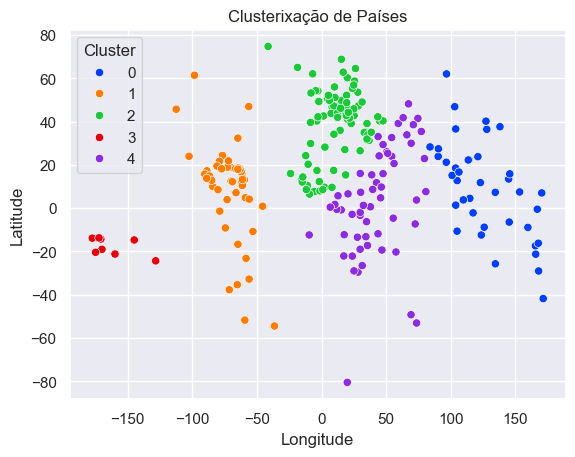

In [50]:

df = pd.read_csv("countries.csv")
sns.set()
data = df.copy()

x = data[['Latitude','Longitude']]

kmeans = KMeans(n_clusters=5,random_state=0)

kmeans.fit(x)

data['Cluster'] = kmeans.labels_


sns.scatterplot(x = 'Longitude',y="Latitude",hue='Cluster',data=data,palette= 'bright')
plt.ylabel('Latitude')
plt.title('Clusterixação de Países')
plt.show()



Text(0, 0.5, 'WCSS')

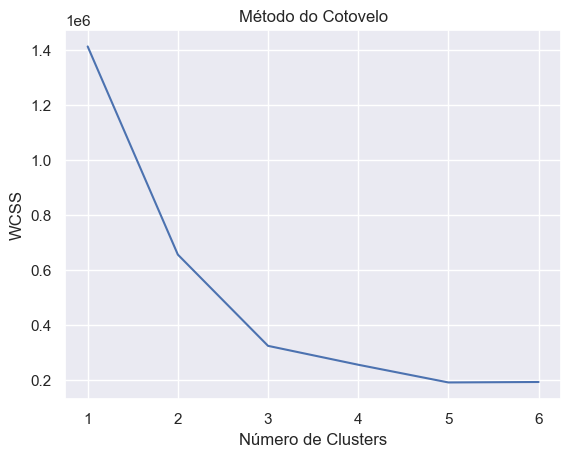

In [52]:

df = pd.read_csv("countries.csv")
data = df.copy()
data = data.dropna()

x = data[['Latitude','Longitude']]

#Calculando o ponto de inflexão do gráfico - Regra do Cotovelo
wcss=[]

for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


plt.plot(range(1,7),wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')




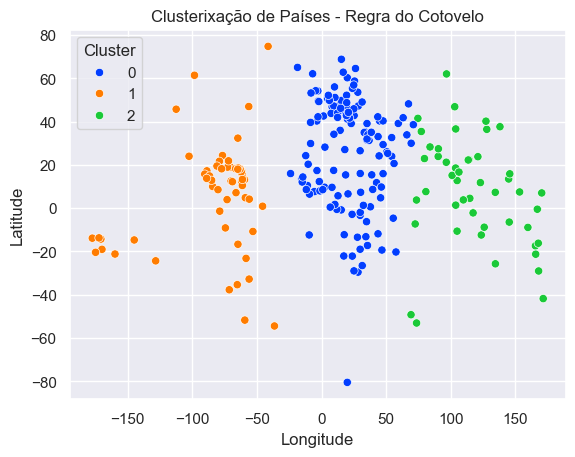

In [54]:

df = pd.read_csv("countries.csv")
sns.set()
data = df.copy()

x = data[['Latitude','Longitude']]

kmeans = KMeans(3)

kmeans.fit(x)

data['Cluster'] = kmeans.labels_


sns.scatterplot(x = 'Longitude',y="Latitude",hue='Cluster',data=data,palette= 'bright')
plt.ylabel('Latitude')
plt.title('Clusterixação de Países - Regra do Cotovelo')
plt.show()